In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [9]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.4 MB 5.9 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# randomly generate a classification dataset

In [3]:
from sklearn.datasets import make_classification

In [38]:
fv,cv = make_classification(n_samples = 1000,
                    n_features = 2,
                    n_informative = 2,
                    n_redundant = 0,
                    n_repeated = 0,
                    n_classes = 2,
                    n_clusters_per_class = 2,
                    weights = [0.5,0.5],
                    class_sep = 1.0,
                    random_state = 1)

In [40]:
fv.shape

(1000, 2)

In [42]:
cv.shape

(1000,)

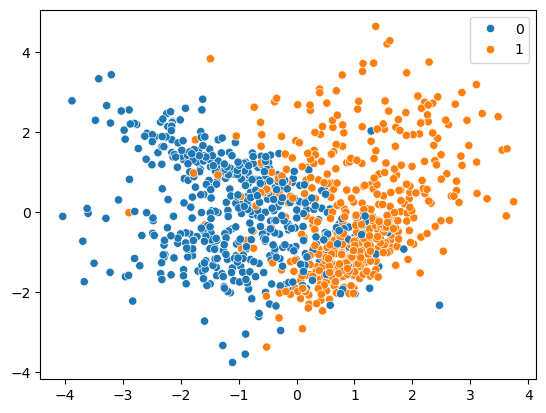

In [44]:
sns.scatterplot(x = fv[:,0],y = fv[:,1],hue = cv)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score

In [54]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.2,stratify = cv)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors = 1)

cross_val_score(estimator = knn,X=x_train,y = y_train,cv = 3,scoring = "accuracy").mean() # But giving only cv accuracy but we need train accuracy also so we cross_validate

0.8350088704908338

In [68]:
d = cross_validate(estimator = knn,X = x_train,y = y_train,cv = 3,scoring = "accuracy",return_train_score=True)

In [70]:
d

{'fit_time': array([0.00200272, 0.00200033, 0.00104094]),
 'score_time': array([0.01427555, 0.01188207, 0.01049709]),
 'test_score': array([0.84269663, 0.82022472, 0.84210526]),
 'train_score': array([1., 1., 1.])}

In [74]:
train_error = []
cv_error = []
for k in range(1,100,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_error.append(1- cross_validate(estimator = knn,X = x_train,y = y_train,cv = 3,scoring = "accuracy",return_train_score=True)["test_score"].mean())
    train_error.append(1-cross_validate(estimator = knn,X = x_train,y = y_train,cv = 3,scoring = "accuracy",return_train_score=True)["train_score"].mean())

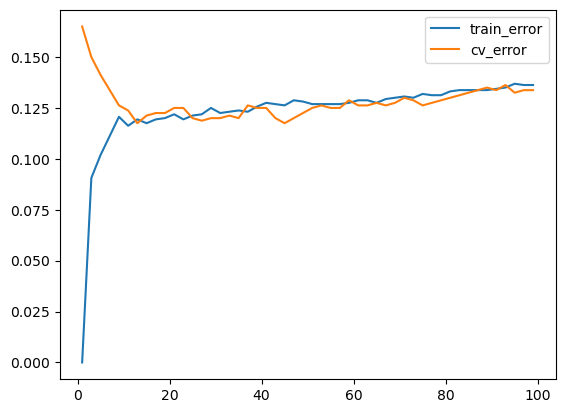

In [78]:
plt.plot(range(1,100,2),train_error,label = "train_error")
plt.plot(range(1,100,2),cv_error,label = "cv_error")
plt.legend()
plt.show()

In [80]:
knn = KNeighborsClassifier(n_neighbors = 90)

In [82]:
model = knn.fit(x_train,y_train)

In [84]:
y_cap = model.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test,y_cap)

0.835